1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
# сгенерируем набор данных
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# градиентный спуск
def eval_model(X, y, iterations, alpha=1e-2):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs=[]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        errs.append(calc_mse(y, y_pred))
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    return W,errs

In [5]:
# стохастический градиентный спуск
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-2):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    errs = []
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errs.append(calc_mse(y_tmp, y_pred_tmp))
    return W,errs

In [6]:
w1,e1 = eval_model(X.T, y, iterations=1000, alpha=1e-2)
w2,e2 = eval_sgd_model(X.T, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
print(e1[-1],e2[-1])

0.010376617612884744 0.007842261112179805


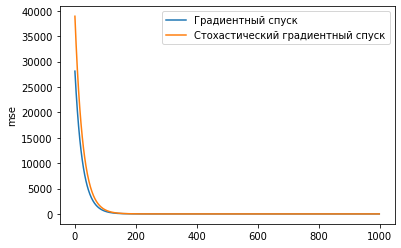

In [7]:
x = np.arange(1000)
plt.plot(x, e1, label="Градиентный спуск")
plt.plot(x, e2, label="Стохастический градиентный спуск")
plt.ylabel("mse")
plt.legend()
plt.show()

Вывод: скорость сходимости стохастического градиентного спуска незначительно выше, чем у градиентного спуска, сходятся в районе примерно 150 итерации. 

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        errs = calc_mse(y, y_pred) + lambda_ * np.dot(W.T, W)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W, errs

In [9]:
def eval_sgd_model_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-2, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    errs = []
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)+ lambda_ * W))
        errs.append(calc_mse(y_tmp, y_pred_tmp))
    return W,errs

In [12]:
X, y = make_regression(n_samples=1000, n_features = 10, noise=1.)
w,e1 = eval_model(X.T, y, iterations=1000, alpha=1e-2)
w,e2 = eval_sgd_model(X.T, y, iterations=1000, qty_in_batch=1, alpha=1e-2)
w,e3 = eval_model_reg2(X.T, y, iterations=1000, alpha=1e-2, lambda_=1e-2)
w,e4 = eval_sgd_model_reg2(X.T, y, iterations=1000, qty_in_batch=1, alpha=1e-2, lambda_=1e-4)

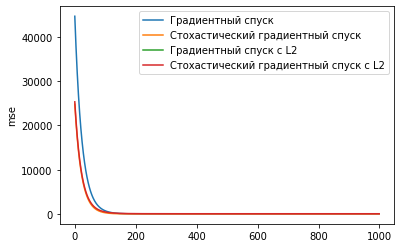

In [13]:
x = np.arange(1000)
plt.plot(x, e1, label="Градиентный спуск")
plt.plot(x, e2, label="Стохастический градиентный спуск")
plt.plot(1, e3, label="Градиентный спуск c L2")
plt.plot(x, e4, label="Стохастический градиентный спуск c L2")
plt.ylabel("mse")
plt.legend()
plt.show()